In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [7]:
# Load datasets
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

In [10]:
def preprocess_data(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

    # Impute missing values
    imputer = SimpleImputer(strategy='most_frequent')
    df['Age'] = imputer.fit_transform(df[['Age']])[:,0]
    df['Embarked'] = imputer.fit_transform(df[['Embarked']])[:,0]

    # Encode categorical variables
    label_enc = LabelEncoder()
    for col in ['Sex', 'Embarked']:
        df[col] = label_enc.fit_transform(df[col])

    return df

In [11]:
# Preprocess the data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [12]:
# Splitting features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize models
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [14]:
# Train models
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [18]:
# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
print('y_pred_lgb',y_pred_lgb)
print('y_pred_xgb',y_pred_xgb)

y_pred_lgb [0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
y_pred_xgb [0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [19]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}\n")

In [20]:
# Evaluate both models
evaluate_model(y_test, y_pred_lgb, "LightGBM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

LightGBM Performance:
Accuracy: 0.8436
Precision: 0.8108
Recall: 0.8108
F1 Score: 0.8108

XGBoost Performance:
Accuracy: 0.7877
Precision: 0.7500
Recall: 0.7297
F1 Score: 0.7397



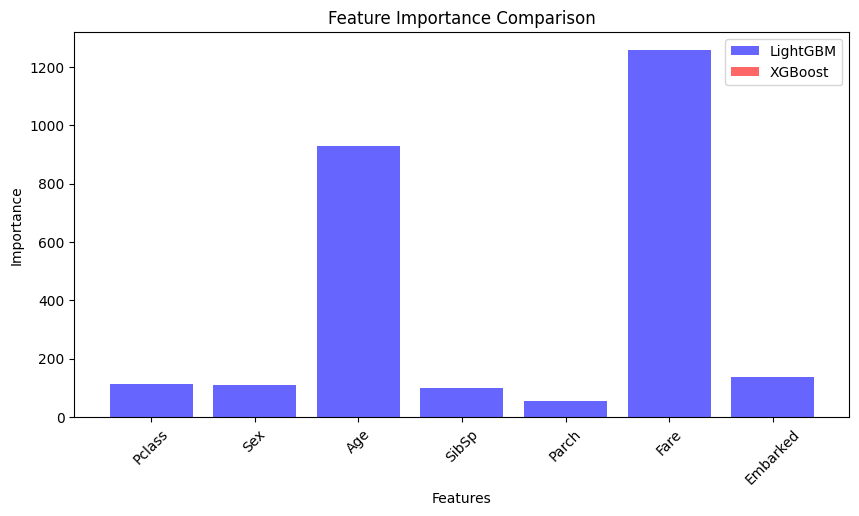

In [21]:
# Visualize feature importance
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lgb_model.feature_importances_, color='blue', alpha=0.6, label='LightGBM')
plt.bar(X.columns, xgb_model.feature_importances_, color='red', alpha=0.6, label='XGBoost')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()